#CAR PRICE PREDICTION WITH MACHINE LEARNING

My aim is to analyse the car price prediction which is one of the major research areas in machine learning. The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. My project assigned by Oasis Infobyte is so clearly definable and this is my project working under machine learning. I imported the dataset from the company's pdf (kaggle), in which they provided with clear information about the Data values.

#Loading the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

#Loading Dataset

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
data.drop(['car_ID'],axis=1,inplace=True)  #dropping unwanted car_ID column

In [6]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no null values found

#Data preprocessing

<Axes: xlabel='price'>

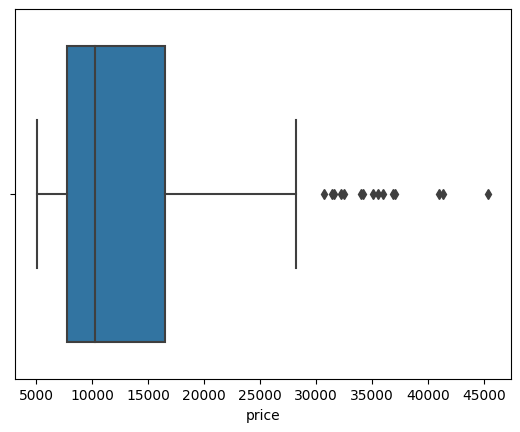

In [7]:
sns.boxplot(x=data['price'])

It seems that they were some outliers

In [8]:
z_score = stats.zscore(data['price'])
data[np.abs(z_score) > 3]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


They were three ouliers, But those car brands BMW, Bunik are  Considered as the brands which  are expensive and  they are valid data points.

<Axes: xlabel='price', ylabel='Density'>

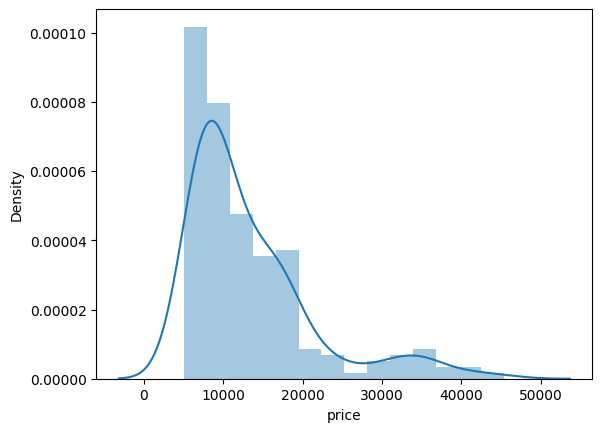

In [9]:
sns.distplot(data['price'])

On considering the graph, the data is skewed. So we use log function to make it normal.

<Axes: xlabel='price', ylabel='Density'>

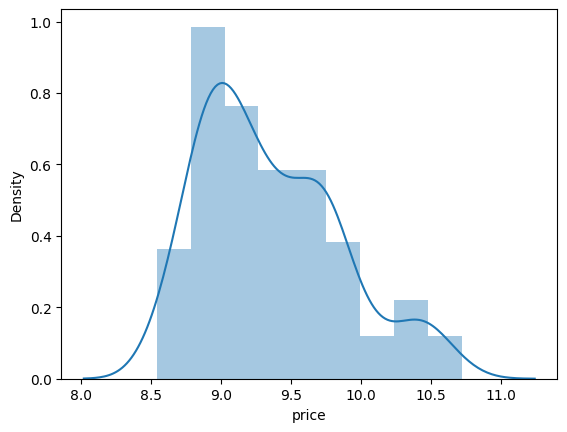

In [10]:
data['price']=np.log1p(data['price'])
sns.distplot(data['price'])

#Exploratory Data Analysis

##1. Numeric Data

<Axes: >

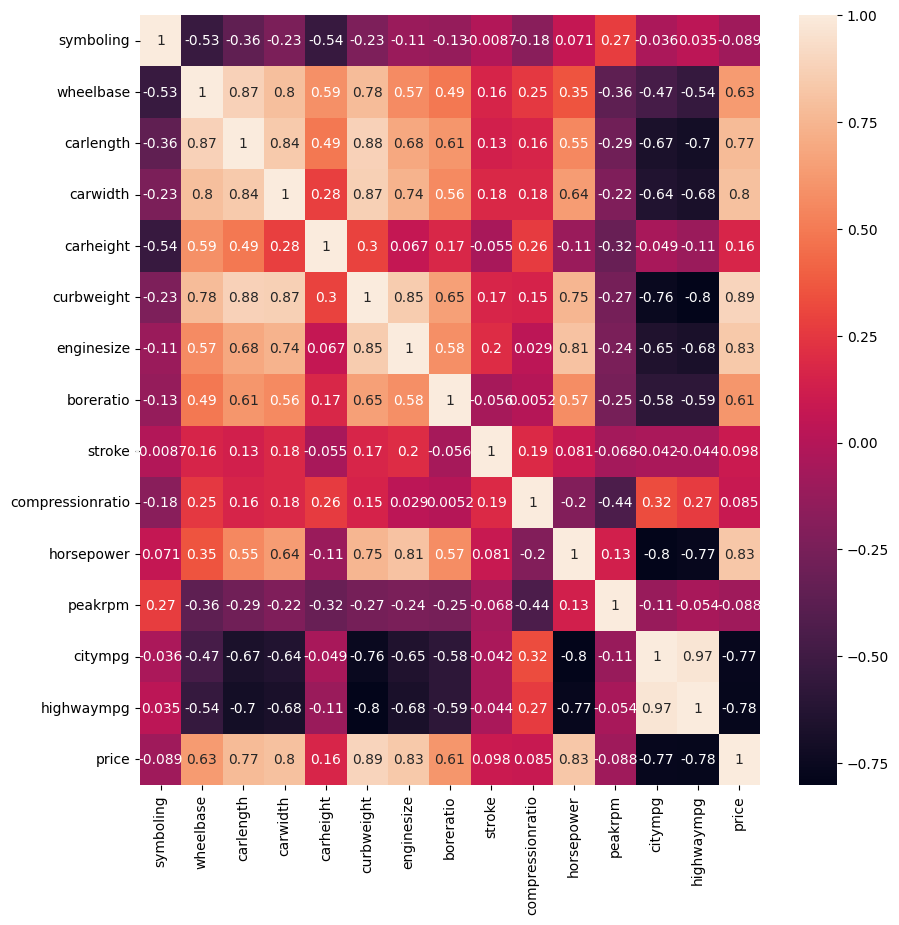

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data._get_numeric_data().corr(),annot=True)

On considering the graph, we can say that price is highly correlated with carlength, carwidth, horesepower, boreratio, wheelbase citympg and highwaympg. Also there is multicolinearity between these variables exist.

Lets reduce the dimensionality using PCA

In [12]:
pca_col= ["enginesize", "curbweight", "horsepower",
               "carwidth", "carlength", "wheelbase",
               "boreratio", "citympg", "highwaympg"]
data_pca=data[pca_col]
data_pca.head()

,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,citympg,highwaympg
0,130,2548,111,64.1,168.8,88.6,3.47,21,27
1,130,2548,111,64.1,168.8,88.6,3.47,21,27
2,152,2823,154,65.5,171.2,94.5,2.68,19,26
3,109,2337,102,66.2,176.6,99.8,3.19,24,30
4,136,2824,115,66.4,176.6,99.4,3.19,18,22


In [13]:
pca_train=PCA(n_components=1)
pca_component=pca_train.fit_transform(data_pca)
principal_data=pd.DataFrame(data=pca_component, columns=['pca1'])
principal_data.head()

,pca1
0,-7.057267
1,-7.057267
2,270.841223
3,-218.880370
4,268.738449


By using PCA we reduces the 9 variables into a single variable.

Now we can check that if there is any relation between the remaining numeric data.

In [14]:
rest_numeric=data._get_numeric_data().drop(pca_col,axis=1)
rest_numeric.head()

,symboling,carheight,stroke,compressionratio,peakrpm,price
0,3,48.8,2.68,9.0,5000,9.510149
1,3,48.8,2.68,9.0,5000,9.711176
2,1,52.4,3.47,9.0,5000,9.711176
3,2,54.3,3.40,10.0,5500,9.543306
4,2,54.3,3.40,8.0,5500,9.767152


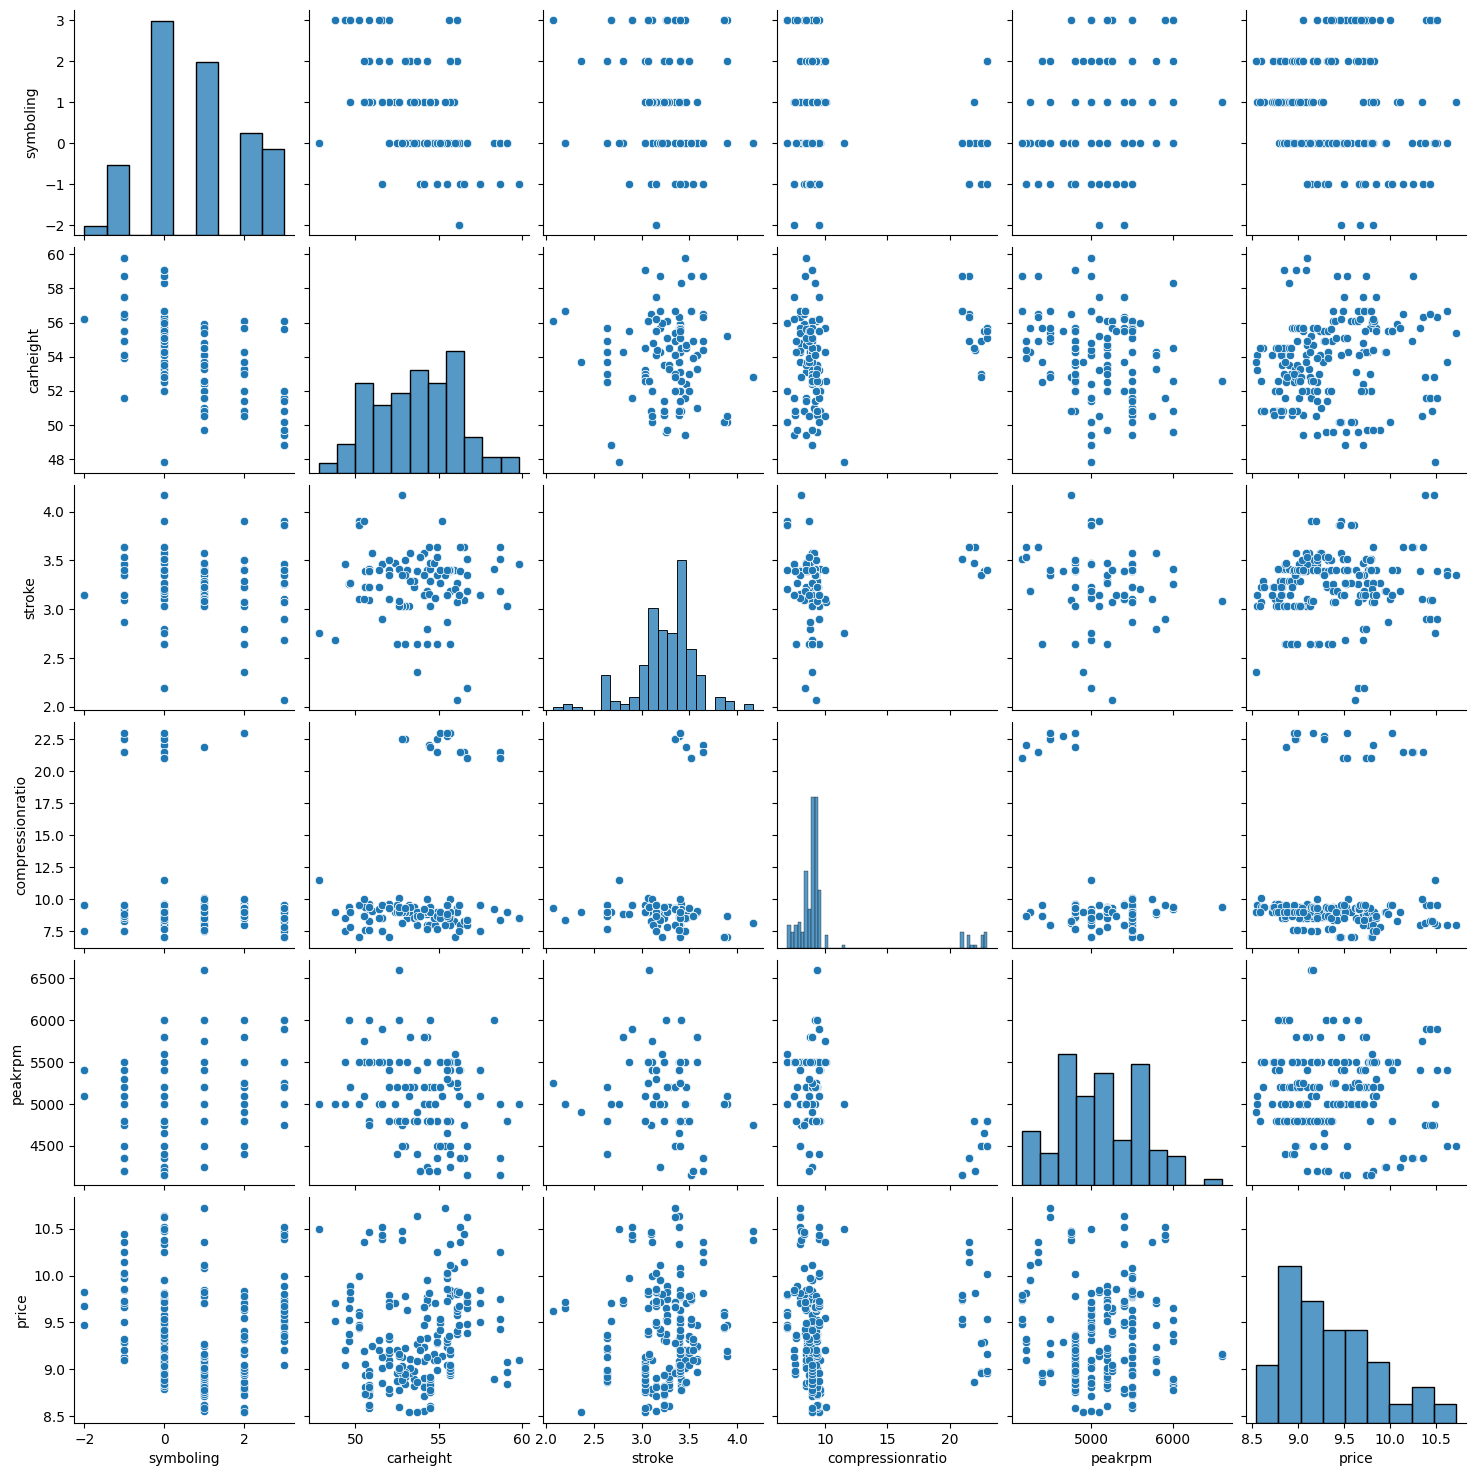

In [15]:
sns.pairplot(rest_numeric)

There are no correlation or pattern found between these data. So we will not consider this.

##2. Categorical data

In [16]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data = categorical_data.drop('CarName', axis=1)
categorical_data=pd.concat([categorical_data, data['price']], axis=1)
categorical_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,9.510149
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,9.711176
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,9.711176
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,9.543306
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,9.767152


In [17]:
dummy_categorical = pd.get_dummies(categorical_data)

<Axes: >

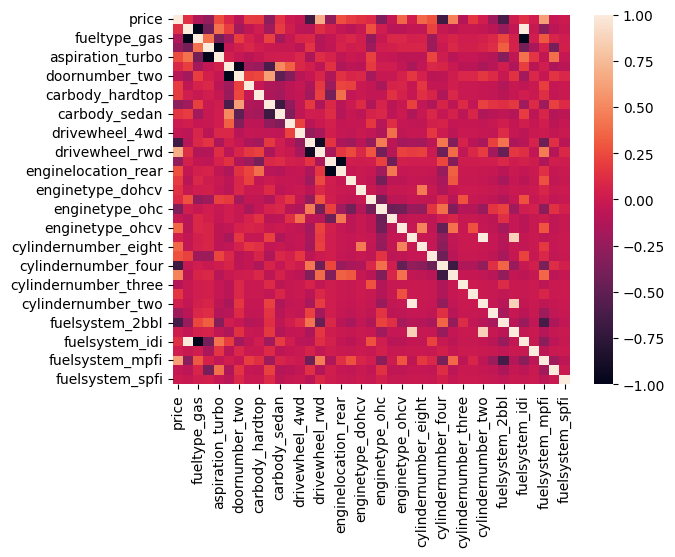

In [18]:
dummy_corr=dummy_categorical.corr()
sns.heatmap(dummy_corr)

The matrix seems to be too complex.

Now filter out the variables with correlation >0.5 or <-0.5

In [19]:
positive_corr = dummy_corr.sort_values('price', )[dummy_corr['price']>0.5]['price']
negative_corr =  dummy_corr.sort_values('price', )[dummy_corr['price']<-0.5]['price']
corelated_columns=list(negative_corr.index)+list(positive_corr.index)
corelated_columns

['cylindernumber_four',
 'drivewheel_fwd',
 'fuelsystem_2bbl',
 'fuelsystem_mpfi',
 'drivewheel_rwd',
 'price']

There is a high correlation with price in these columns.

<Axes: >

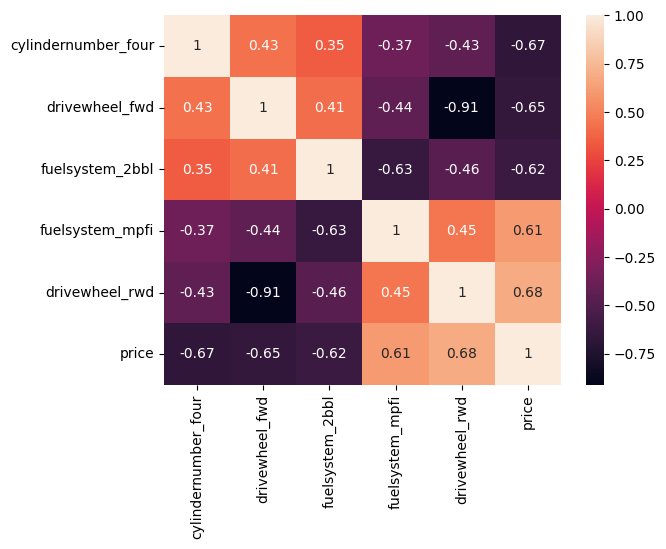

In [20]:
sns.heatmap(dummy_corr[corelated_columns].loc[corelated_columns],annot=True)

We can conclude that there is high colinearity between (drivewheel_fwd) and (drivewheel_rwd).So we will only use drivewheel_fwd.

Now combine the PCA columns and the corelated columns.

In [21]:
new_data=pd.concat([principal_data,dummy_categorical[corelated_columns]],axis=1)
new_data.drop('drivewheel_fwd',axis=1,inplace=True)
new_data.head()

,pca1,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi,drivewheel_rwd,price
0,-7.057267,1,0,1,1,9.510149
1,-7.057267,1,0,1,1,9.711176
2,270.841223,0,0,1,1,9.711176
3,-218.880370,1,0,1,0,9.543306
4,268.738449,0,0,1,0,9.767152


Convert the true or false value into 1 or 0.

In [22]:
def mapping(x):
    if x==True:
        return 1
    return 0

for col in ['cylindernumber_four','fuelsystem_2bbl','fuelsystem_mpfi','drivewheel_rwd']:
    new_data[col]=new_data[col].apply(mapping)
new_data.head()

,pca1,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi,drivewheel_rwd,price
0,-7.057267,1,0,1,1,9.510149
1,-7.057267,1,0,1,1,9.711176
2,270.841223,0,0,1,1,9.711176
3,-218.880370,1,0,1,0,9.543306
4,268.738449,0,0,1,0,9.767152


#Train test split

In [23]:
x=new_data.drop('price',axis=1)
y=new_data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#Model Training and testing

In [24]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8474824028377841

#Conclusion

The model has a r2 score of 84.75%